## 데이터 확인

In [10]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])
sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


## 이상치 제거

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

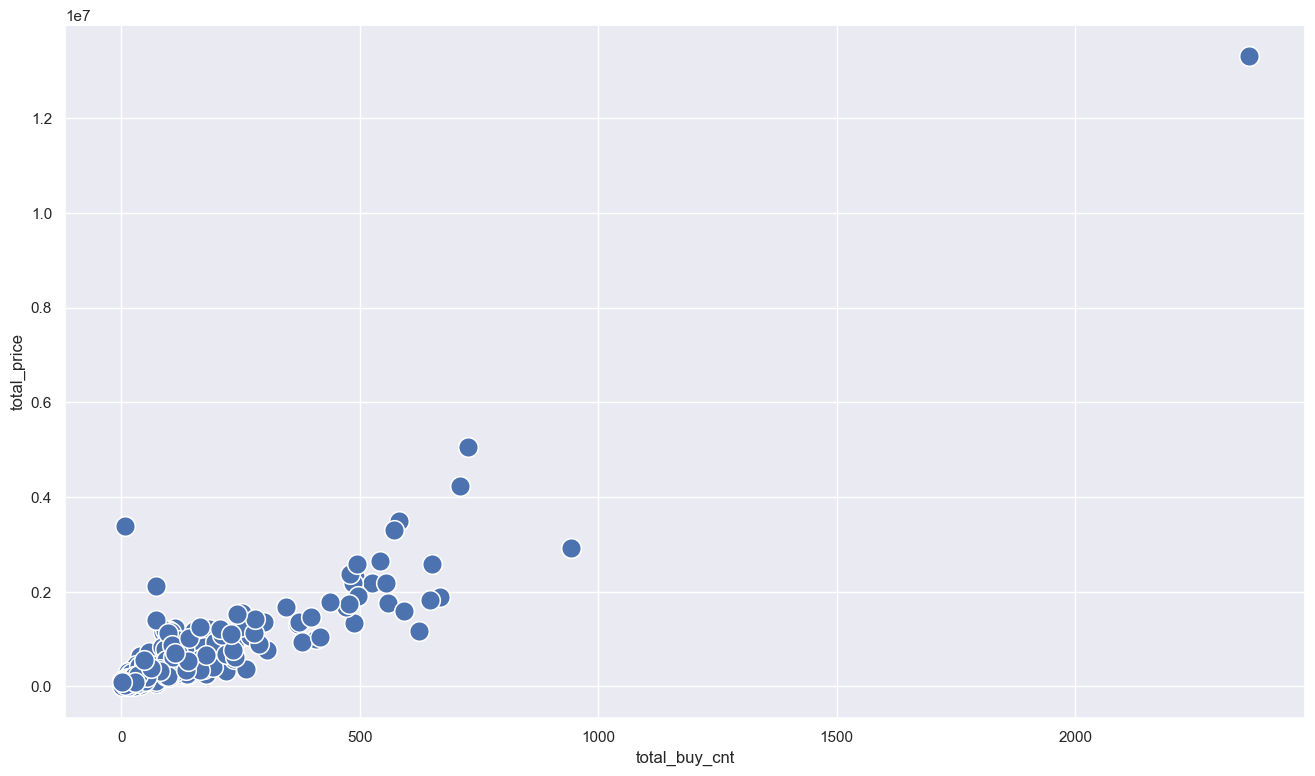

In [11]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16,9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

>[ 코드 코멘트 ]
>```python
>sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)
>```
>여기서 s 파라미터는 점의 크기를 지정하는 인자.

In [12]:
# 이상치 제거 함수
def get_outlier_mask(df, weight=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight  # 정상범위의 최소값
    range_max = Q3 + IQR_weight  # 정상범위의 최대값

    outlier_per_column = (df < range_min) | (df > range_max)  # 최소값보다 작거나, 최대값보다 크면 이상치로 간주. 
                                                              # -> 불린값을 Pandas Series로 반환..할 듯
    
    is_outlier = outlier_per_column.any(axis=1)  # 각 행에 대하여 True 혹은 False 값을 가진 Pandas Series가 반환됨. (True이면 이상치.)

    return is_outlier

>[ 코드 코멘트 ]
>```python
>is_outlier = outlier_per_column.any(axis=1)
>```
>any(axis=1)은 데이터프레임의 **행**을 따라 각 행(axis)에 대해 어떠한 조건을 만족하는 값이 하나라도 있는지(any)를 확인할 때 사용.  
>any 메서드의 인자로 axis=1을 넣으면 행 방향.  
> [>> any의 실행 결과 참고](https://www.codeit.kr/community/questions/UXVlc3Rpb246NjRjNTFiZjMzN2U1NmI0NDFiYzdhYmFl)

>**any 함수**  
>반복가능한 자료형(iterable) 중 *하나라도 True이면 True* 를 반환하는 메소드.  
>인자로 받은 자료형이 비어있는 경우 False를 반환.
>
>**all 함수**  
>반복가능한 자료형(iterable) 중 *하나라도 False이면 False* 를 반환하는 메소드.  

In [13]:
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)  # True/False 값을 가진 Pandas Series가 반환됨.

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

>[ 코드 코멘트 ]
>```python
>sales_df = sales_df[~outlier_idx_cust_df]
>```
> 여기서 '~'의 역할은 논리 반전. 즉 oulier_idx_cust_df에서 True인 행은 이상치를 의미하므로,  
> 논리를 반전하여 정상 데이터인 False 행들만 sales_df에 저장하겠다는 의미.

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

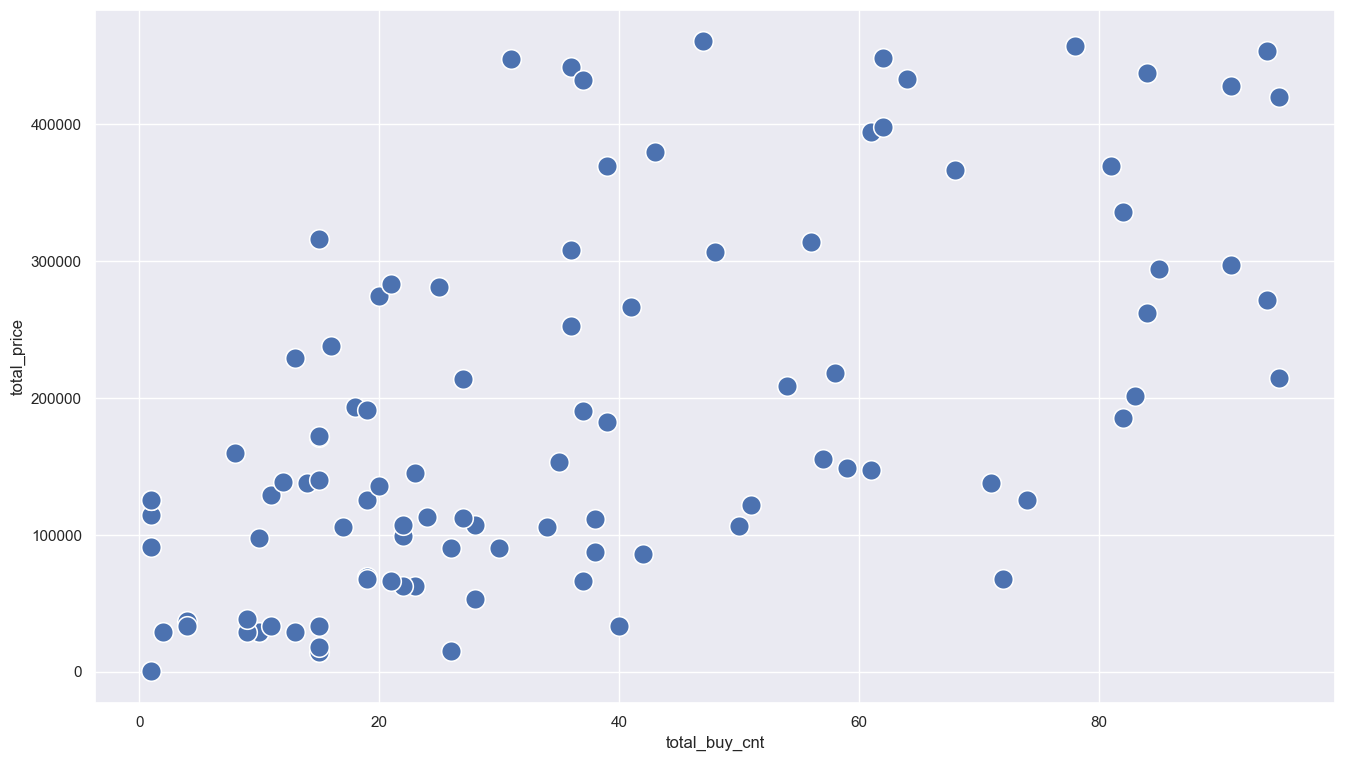

In [14]:
# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

## 데이터 표준화

데이터를 보면 `total_buy_cnt`는 단위가 1개이고, 가장 큰 값은 350개.  
하지만, `total_price`는 기본 단위가 10,000원.  
두 변수의 단위 차가 크기 때문에, `total_price`의 영향력이 너무 커져서 결과가 잘못될 가능성이 높다.  
따라서 표준화를 통해 **변수 단위에 따른 상대적 영향을 제거**해야 한다.

In [16]:
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean) / df_std  # 컬럼별 표준화 진행 ~> 이게 왜 표준화가 되지?

# 컬럼명 설정.
scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index

scaled_df

,total_buy_cnt,total_price
customer_id,,
12471,-0.99,-0.66
12557,-0.40,-0.71
12600,-0.88,0.33
12686,1.74,0.57
12748,-0.74,-0.60
...,...,...
17949,-1.33,-0.45
17951,-0.03,0.50
18085,0.93,1.59


- 표준화를 하면 평균이 0, 분산은 1로 값이 조정되어 단위가 통일된다.